# **Insurance Claim Prediction - Capstone Project**

This project aims to build a robust predictive machine learning model to determine if a building will have an insurance claim during a certain period based on building characteristics. This analysis is crucial for insurance companies to assess risk, set premiums, and optimize their portfolio.

### **🎯Objectives**:
- Understand and explore the dataset.
- Perform data cleaning and preprocessing.
- Perform detailed Exploratory Data Analysis (EDA).
- Experiment preprocessing for modeling.
- Implement and evaluate different models (e.g., Logistic Regression, Decision Tree, SVM, Random Forest and XGBoosting).

### **Methodology**:
- **Data Loading and Inspection**: Understand the structure and quality of the dataset.
- **Exploratory Data Analysis (EDA)**: Visualize relationships between the target variable and other variables in the dataset.
- **Preprocessing**: Handle missing values, encode categorical data, and scale features.
- **Modeling**: Model selection, training and optimizing classification algorithmns (Logistic regression, Decision Tree, SVM, Random Forest and XGBoost).
- **Model Evaluation**: Assess model performance using Precision, Recall, F1-Score, ROC-AUC Curve, Robust Cross-Validation, and Confusion Matrix as required.

### **Dataset Overview**
___
|**Variable**|**Description**|
| :---| :--- |
| Customer Id | Identification number for the policy holder |
| YearOfObservation | Year of observation for the insured policy |
| Insured_Period | Year of insurance policy in Olusola Insurance (Ex: Full year insurance, Policy duration = 1; 6 months = 0.5 |
| Residential | Is the building a residential building or not |
| Building_Painted | Is the building painted or not (N-Painted; V-Not Painted) |
| Building_Fenced | Is the building fenced or not (N-Fenced; V-Not Fenced) |
| Garden | Building has garden or not (V-has garden; O-no garden) |
| Settlement | Area where the building is located (R-rural area; U-urban area) |
| Building Dimension | Size of the insured building in m2 |
| Building_Type | The type of building (Type 1, 2, 3, 4) |
| Date_of_Occupancy | Date building was first occupied |
| NumberOfWindows | Number of wiindows in the building |
| Geo_Code | Geographical Code of the insured building |
| Claim | Target variable (0: no claim, 1: at least one claim over insured period) |

In [1]:
# Importing necessary libraries for data manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing modeling libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc

# Configuration for cleaner outputs
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

## **Phase 1: 📥🔍Data Loading and Initial Inspection**

In [2]:
# Load the dataset

df = pd.read_csv(r"C:\Users\BLOOMZMART\Documents\Personal\Trainings\Tech Only\AI NOW October_2025\ML Projects_2026\Train_data.csv")

In [3]:
# Displaying the first 5 records in the dataset

df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
# Check the dimensions of the dataset

df.shape

(7160, 14)

In [5]:
# Check data information and types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


#### **Observations**:
- The dataset contains ***7160*** records.
- There are missing values in the ***Garden***, ***Building Dimension***, ***Date_of_Occupancy*** and ***Geo_Code*** columns.
- ***NumberOfWindows*** column is object but should likely be numeric.
- ***Customer Id*** column acts as a unique identifier and would be dropped for modeling.

In [6]:
# Check for missing values

df.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [7]:
# Check for duplicates in the dataset

df.duplicated().sum()

np.int64(0)

#### **Observation**:
- There are no duplicate values in the dataset.

In [8]:
# Check for unique characteristics in each column

df.nunique()

Customer Id           7160
YearOfObservation        5
Insured_Period         401
Residential              2
Building_Painted         2
Building_Fenced          2
Garden                   2
Settlement               2
Building Dimension    2043
Building_Type            4
Date_of_Occupancy      134
NumberOfWindows         11
Geo_Code              1307
Claim                    2
dtype: int64

## **🧹🛠️Data Cleaning**

In [9]:
# Checking unique values in NumberOfWindows column

print("Unique values in NumberOfWindows column before cleaning:",
      df["NumberOfWindows"].unique())

Unique values in NumberOfWindows column before cleaning: ['   .' '4' '3' '2' '5' '>=10' '6' '7' '9' '8' '1']


In [10]:
# Cleaning NumberOfWindows column


def clean_windows(val):
    val = str(val).strip()
    if val == '.':
        return np.nan
    elif val == '>=10':
        return 10  # Treating as 10 for numerical consistency
    else:
        try:
            return float(val)
        except:
            return np.nan

df['NumberOfWindows'] = df['NumberOfWindows'].apply(clean_windows)
print('Unique values in NumberOfWindows column after cleaning:',
      df['NumberOfWindows'].unique())  # Check the unique values in NumberOfWIndows column

Unique values in NumberOfWindows column after cleaning: [nan  4.  3.  2.  5. 10.  6.  7.  9.  8.  1.]


In [11]:
# Handling missing values in the dataset

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

print("Confirming Missing Values After Data Cleaning")
print("=============================================")
print(df.isna().sum())

Confirming Missing Values After Data Cleaning
Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64


In [12]:
# Checking the first 5 records for confrimation

df.head()  

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,4.0,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4.0,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,4.0,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,4.0,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3.0,1053,0


In [13]:
# Inspecting the Geo_Code column

df["Geo_Code"].unique()

array(['1053', '1143', '1160', ..., '2B050', '2B096', '2B353'],
      dtype=object)

In [14]:
# To check total numeric and alphanumeric records in Geo_Code column

geo_series = df['Geo_Code'].astype(str).str.strip() # Ensure string format
numeric_mask = geo_series.str.fullmatch(r'\d+') # Numeric records (digits only)

# Alphanumeric records (contain at least one letter)
alphanumeric_mask = geo_series.str.contains(r'[A-Za-z]', regex=True)


numeric_count = numeric_mask.sum() # Counts
alphanumeric_count = alphanumeric_mask.sum()
total_records = len(df)

print(f"Total records: {total_records}")
print(f"Numeric Geo_Codes: {numeric_count}")
print(f"Alphanumeric Geo_Codes: {alphanumeric_count}")

Total records: 7160
Numeric Geo_Codes: 7092
Alphanumeric Geo_Codes: 68


In [15]:
# Percentage numeric and alphanumeric records in the Geo_Code column

numeric_pct = (numeric_count / total_records) * 100
alphanumeric_pct = (alphanumeric_count / total_records) * 100

print(f"Total records: {total_records}")
print(f"Numeric Geo_Codes: {numeric_count} ({numeric_pct:.2f}%)")
print(f"Alphanumeric Geo_Codes: {alphanumeric_count} ({alphanumeric_pct:.2f}%)")

Total records: 7160
Numeric Geo_Codes: 7092 (99.05%)
Alphanumeric Geo_Codes: 68 (0.95%)


#### **Observation**:
- The ***Geo_Code*** column has ***68 (0.95%)*** alphanumeric records, and will be dropped to simplify preprocessing.

In [16]:
# To drop alphanumeric values in Geo_Code column

geo_series = df['Geo_Code'].astype(str).str.strip() # Remove possible string 
df = df[geo_series.str.fullmatch(r'\d+')] # Keep only values made only of digits
df['Geo_Code'] = df['Geo_Code'].astype(float) # Convert numeric strings to float
df.reset_index(drop=True, inplace=True)

In [17]:
# Checking dimension of the dataset after handling missing values

df.shape

(7092, 14)

In [18]:
# Inspecting the dataset after cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7092 entries, 0 to 7091
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7092 non-null   object 
 1   YearOfObservation   7092 non-null   int64  
 2   Insured_Period      7092 non-null   float64
 3   Residential         7092 non-null   int64  
 4   Building_Painted    7092 non-null   object 
 5   Building_Fenced     7092 non-null   object 
 6   Garden              7092 non-null   object 
 7   Settlement          7092 non-null   object 
 8   Building Dimension  7092 non-null   float64
 9   Building_Type       7092 non-null   int64  
 10  Date_of_Occupancy   7092 non-null   float64
 11  NumberOfWindows     7092 non-null   float64
 12  Geo_Code            7092 non-null   float64
 13  Claim               7092 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 775.8+ KB


In [19]:
df['Geo_Code'].unique()

array([ 1053.,  1143.,  1160., ..., 95585., 95598., 95607.])

In [20]:
# Checking the statistical summary of the dataset

df.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
count,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000
mean,2013.666667,0.909588,0.308376,1860.298928,2.178229,1964.740130,4.162578,50220.649746,0.227862
std,1.383669,0.239824,0.461855,2261.864979,0.941732,34.777736,1.286355,30229.750896,0.419483
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,1.000000,1053.000000,0.000000
25%,2012.000000,0.997268,0.000000,530.000000,2.000000,1960.000000,4.000000,17300.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,4.000000,56121.000000,0.000000
75%,2015.000000,1.000000,1.000000,2240.000000,3.000000,1980.000000,4.000000,75118.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,10.000000,95607.000000,1.000000


## **Phase 2: 📊Exploratory Data Analysis (EDA)**

In [21]:
# Checking the number of buildings with insurance claim versus those without insurance claim

print("Buildings with insurance claim versus those without insurance claim")
print("===================================================================")
df["Claim"].value_counts()

Buildings with insurance claim versus those without insurance claim


Claim
0    5476
1    1616
Name: count, dtype: int64

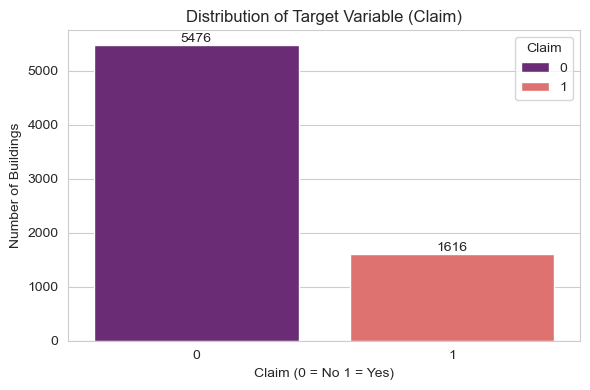

Class Distribution:
Claim
0    77.21
1    22.79
Name: proportion, dtype: float64


In [22]:
# Visualizing target variable distribution

plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Claim", data=df, hue="Claim", palette="magma")
plt.title("Distribution of Target Variable (Claim)")
plt.xlabel("Claim (0 = No 1 = Yes)")
plt.ylabel("Number of Buildings")

# To place counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%d", fontsize=10) # To place counts on top of each bar

plt.tight_layout()
plt.show()

clm_pct = df["Claim"].value_counts(normalize=True).mul(100).round(2)  # Percentage claim rounded up to 2 decimal paces
print(f"Class Distribution:\n{clm_pct}")

#### **Insight**:
- The dataset is imbalanced, where ***‘No Claim’*** instances account for about ***77%*** of the total records, while ***‘Claim’*** instances represent the remaining ***23%***. This will be addressed during modeling using class weights or metrics like Recall, F1-Score and ROC-AUC.

In [23]:
# Checking distribution of insurance observations by year

df["YearOfObservation"].value_counts()

YearOfObservation
2012    1847
2013    1792
2014    1362
2015    1060
2016    1031
Name: count, dtype: int64

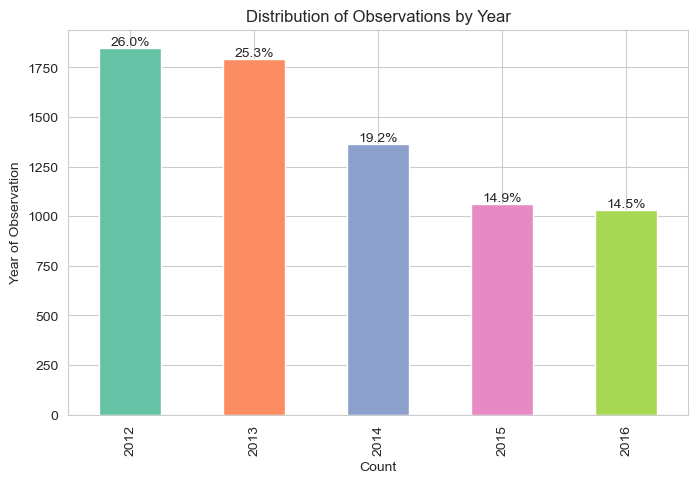

In [24]:
# Visualizing distribution of insurance observations by year

counts = df["YearOfObservation"].value_counts().sort_index()
percentages = counts / counts.sum() * 100   # To convert the counts to percentages
colors = plt.cm.Set2(range(len(counts)))  #To add distinct colours

plt.figure(figsize=(8, 5))
ax = counts.plot(kind="bar", color=colors)
plt.title("Distribution of Observations by Year")
plt.xlabel("Count")
plt.ylabel("Year of Observation")

# Adding percentage labels on bars
for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(i, count, f"{pct:.1f}%", ha="center", va="bottom")

plt.show()

#### **Insights**:
- There is a steady decline in observations ***from 2012 to 2016***, indicating a consistent reduction in reported insurance records over time.
- This downward trend may be driven by changes in business activities, data collection practices, or portfolio size (fewer active policies or insured assets), and should be considered when interpreting risk metrics and year-over-year performance.

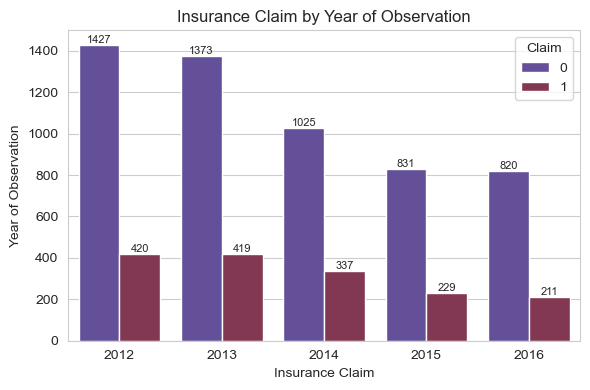

In [25]:
# Analyzing insurance claim by Year of Observation

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x="YearOfObservation", hue="Claim", palette="twilight")
plt.title("Insurance Claim by Year of Observation")
plt.xlabel("Insurance Claim")
plt.ylabel("Year of Observation")


# Placing counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%d", fontsize=8)

plt.tight_layout()
plt.show()

#### **Insight**:
- The highest insurance claims were recorded in 2012 ***(420 claims)*** while the least were in 2016 ***(211 claims)***.

In [26]:
df["Residential"].value_counts()

Residential
0    4905
1    2187
Name: count, dtype: int64

In [27]:
# Residential buildings with insurance claims

print("Residential buildings with insurance claim versus those without insurance claim")
print(f"===============================================================================")
insured_residential = df.groupby("Residential")["Claim"].count().reset_index()
insured_residential

Residential buildings with insurance claim versus those without insurance claim


,Residential,Claim
0,0,4905
1,1,2187


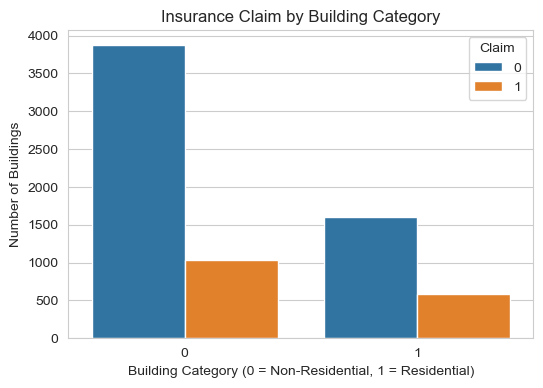

In [28]:
# Visualizing residential buildings with insurance claim

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Residential", hue="Claim")
plt.title("Insurance Claim by Building Category")
plt.xlabel("Building Category (0 = Non-Residential, 1 = Residential)")
plt.ylabel("Number of Buildings")
plt.show()

#### **Insight**:
- Non-residential buildings generate higher insurance claims compared to residential buildings, indicating a greater overall risk exposure within the non-residential property segment.

In [29]:
df["Building_Painted"].value_counts()

Building_Painted
V    5325
N    1767
Name: count, dtype: int64

In [30]:
df["Building_Fenced"].value_counts()

Building_Fenced
N    3551
V    3541
Name: count, dtype: int64

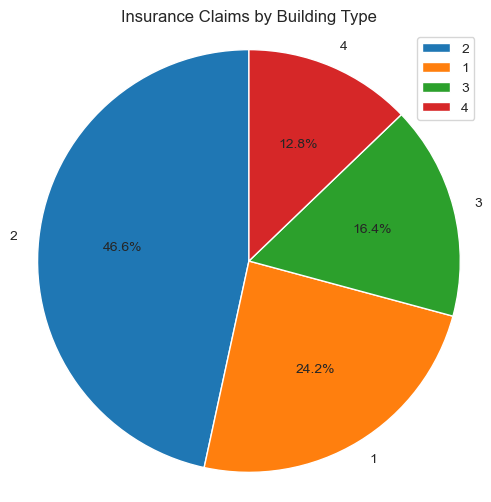

In [31]:
# Analyzing Insurance Claim by Building Type

data = df["Building_Type"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(data,
        labels=data.index,
        autopct="%1.1f%%",
        startangle=90
       )
plt.title("Insurance Claims by Building Type")
plt.axis("equal")  # To ensure the pie chart is circular
plt.legend()
plt.show()

#### **Insight**:
- The type 2 buildings have the highest insurance claims ***(46.6%)***, while building type 4 has the least insurance claims ***(12.8%)***, indicating that type 2 buildings are mostly non-residential.

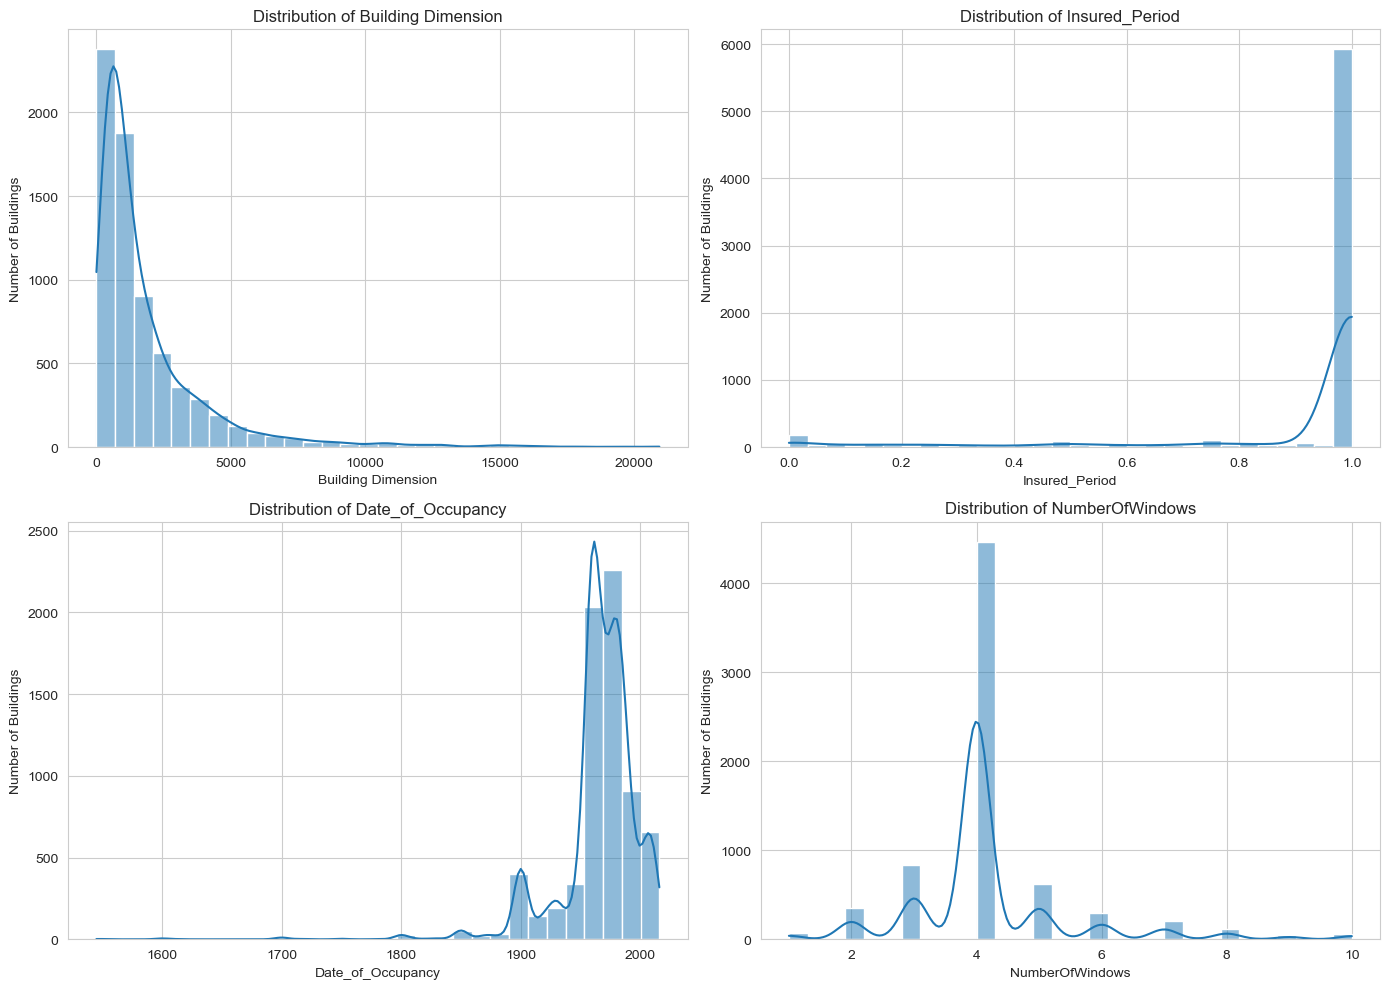

In [32]:
# Numerical distributions

num_cols =["Building Dimension", "Insured_Period", "Date_of_Occupancy", "NumberOfWindows"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.ylabel("Number of Buildings")
plt.tight_layout()
plt.show()

#### **Insights**:
- Building dimension exhibits a right-skewed distribution, suggesting that the majority of insured properties are smaller in size, while large buildings are comparatively rare and form the upper tail of the distribution.
- Most insured buildings are covered for the full policy year, with the insured period predominantly concentrated at one year.

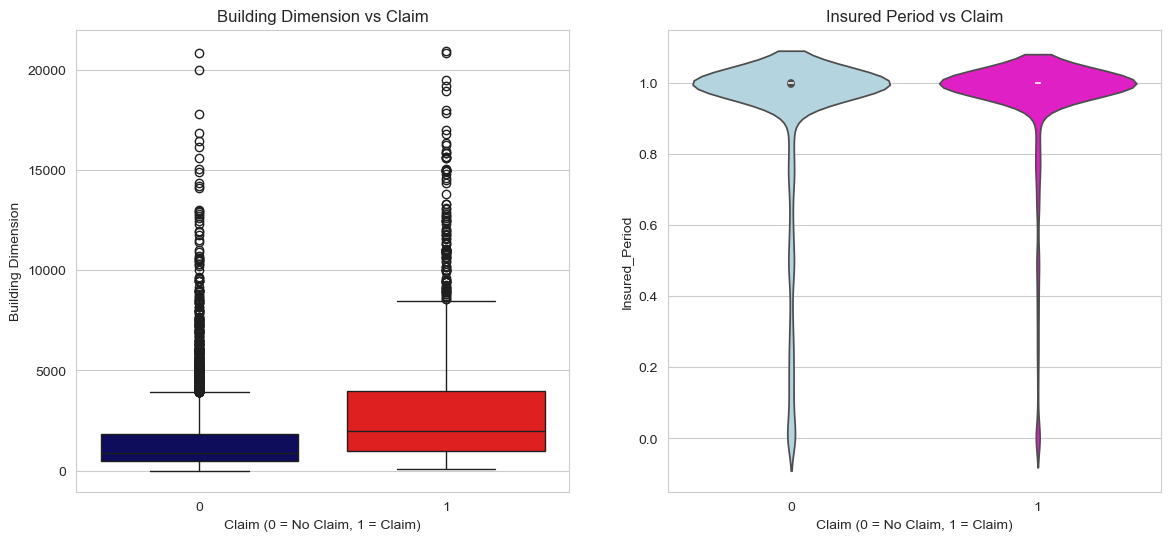

In [33]:
# Insurance Claims by Building Dimension and Insured_Period

colors = {'0': '#000068', '1': '#FF0000'}
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Claim', y='Building Dimension', data=df, palette=colors)
plt.title('Building Dimension vs Claim')
plt.xlabel('Claim (0 = No Claim, 1 = Claim)')


colors = {'0': '#ADD8E6', '1': '#ff00db'}
plt.subplot(1, 2, 2)
sns.violinplot(x='Claim', y='Insured_Period', data=df, palette=colors)
plt.title('Insured Period vs Claim')
plt.xlabel('Claim (0 = No Claim, 1 = Claim)')
plt.show()

#### **Insights**:
- Larger buildings tend to generate more insurance claims, implying higher risk exposure and potential loss severity, and should therefore attract closer underwriting scrutiny and differintiated premium pricing.
- Insurance claim occurence does not vary significantly by policy duration, indicating the coverage length is not a key risk driver, while the dominance of full-year policies reflects customer preference and should guide product design and retention strategies rather than risk differentiation.

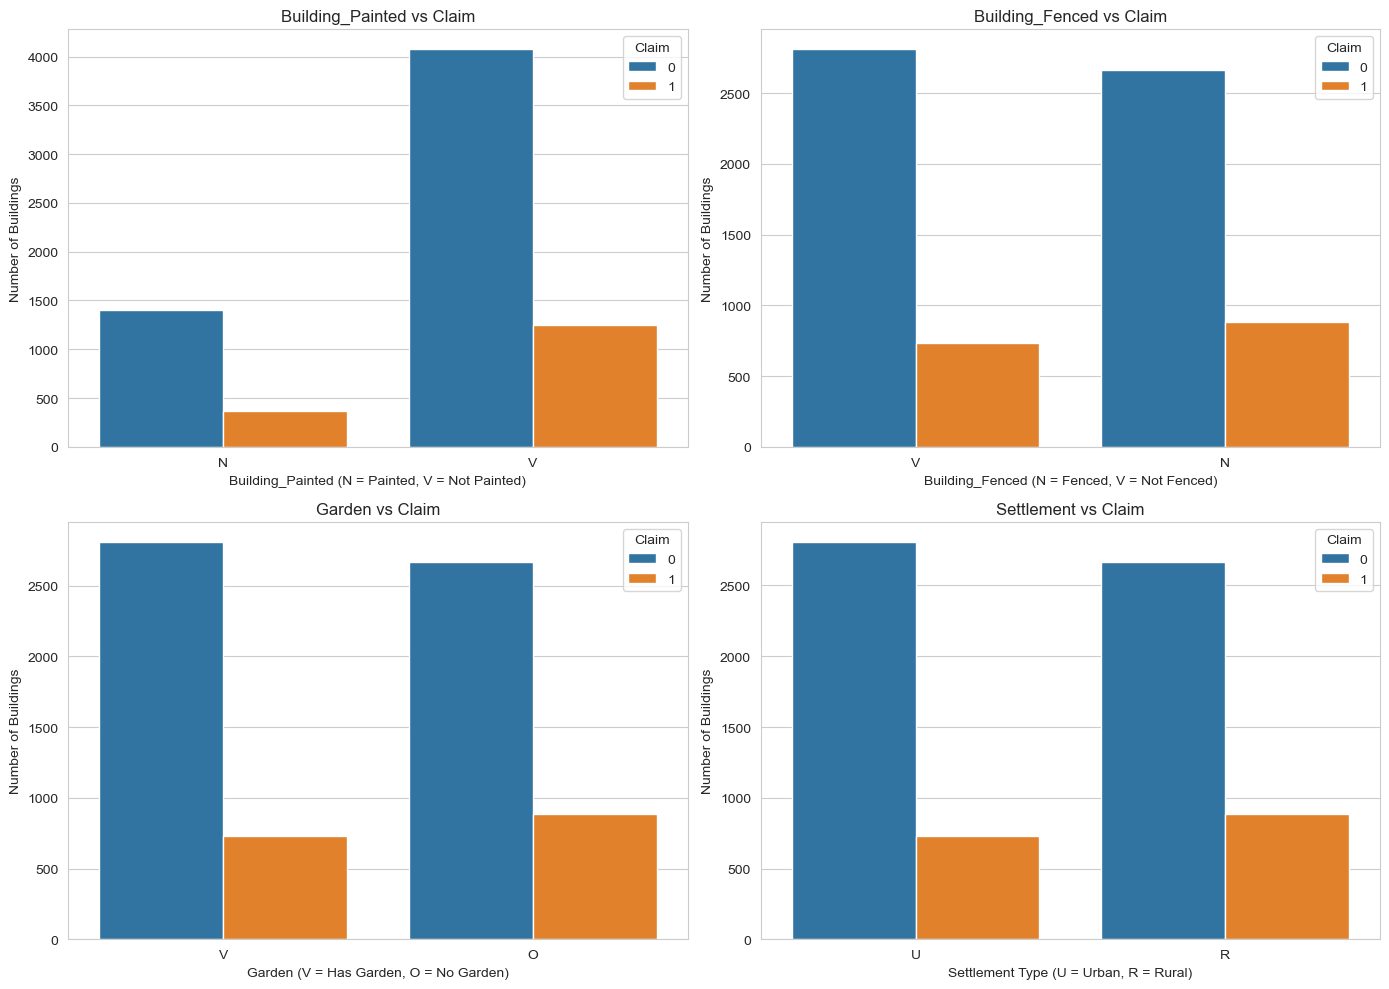

In [34]:
# Categorical Analysis

cat_cols = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']

xlabels = {
    'Building_Painted': 'Building_Painted (N = Painted, V = Not Painted)',
    'Building_Fenced': 'Building_Fenced (N = Fenced, V = Not Fenced)',
    'Garden': 'Garden (V = Has Garden, O = No Garden)',
    'Settlement': 'Settlement Type (U = Urban, R = Rural)'
}

plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Claim', data=df)
    plt.xlabel(xlabels[col])    # Manual x-axis label
    plt.title(f'{col} vs Claim')
    plt.ylabel('Number of Buildings')
    
plt.tight_layout()
plt.show()

#### **Insights**:
- Unpainted buildings have a higher claim rate than painted ones, suggesting that exterior maintenance quality is a useful indicator for underwriting and pricing decisions.
- Buildings without perimeter fencing show slightly lower insurance claim rates, indicating lower risk and informing underwriting and pricing strategies.
- Buildings with gardens tend to have a lower insurance claim rate, suggesting that properties with outdoor maintenance and landscaping may be better cared for and less prone to damage, which could inform risk assessment and premium pricing strategies.
- Garden availability exhibits a strong association with fencing status, indicating that buildings with gardens are typically fenced, while those without gardens are more likely to be unfenced. This suggests overlapping explanatory power between the two features, which has implications for feature selection and model interpretability.
- Properties located in non-urban areas demonstrate a higher insurance claim rate than those in urban areas, signaling increased location-driven risk and supporting the adoption of location-based pricing and risk mitigation strategies.

## **Phase 3: 🛠️Data Preprocessing**

In [35]:
# Dropping column that has no predictive value

df = df.drop(columns=['Customer Id'])
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,4.0,1053.0,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4.0,1053.0,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,4.0,1053.0,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,4.0,1053.0,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3.0,1053.0,0


In [36]:
# Identify all categorical columns in the dataset

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']

In [37]:
# Identify all numerical columns in the dataset

num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols

['YearOfObservation',
 'Insured_Period',
 'Residential',
 'Building Dimension',
 'Building_Type',
 'Date_of_Occupancy',
 'NumberOfWindows',
 'Geo_Code',
 'Claim']

## Feature Encoding

In [38]:
# Encoding features

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [39]:
# Checking for encoding

df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,0,1,1,1,290.0,1,1960.0,4.0,1053.0,0
1,2015,1.0,0,1,0,0,0,490.0,1,1850.0,4.0,1053.0,0
2,2014,1.0,0,0,1,1,1,595.0,1,1960.0,4.0,1053.0,0
3,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,4.0,1053.0,0
4,2014,1.0,0,1,0,0,0,680.0,1,1800.0,3.0,1053.0,0


## Feature Correlation

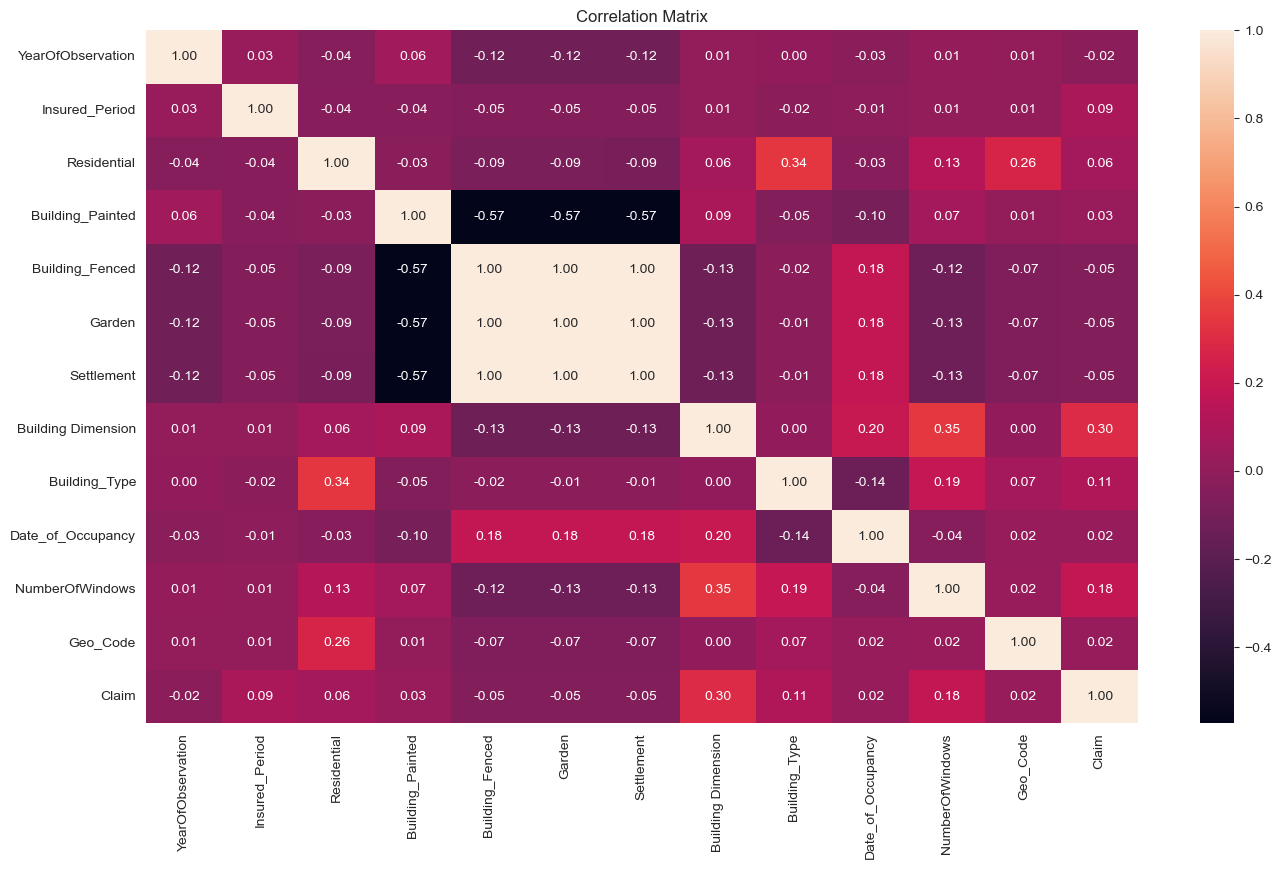

In [40]:
# Correlation Heatmap

plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### **Insights**:
- The size of buildings as reflected in the ***Building Dimension and NumberOfWindows*** columns are strong predictive features.
- Multicollinearity exists with ***Building_Fenced, Garden and Settlement*** columns, and will be handled accordingly defore modeling.

In [41]:
# Dropping Building_Fenced column due to multicollinearity

df = df.drop(columns=['Building_Fenced'])
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,0,1,1,290.0,1,1960.0,4.0,1053.0,0
1,2015,1.0,0,1,0,0,490.0,1,1850.0,4.0,1053.0,0
2,2014,1.0,0,0,1,1,595.0,1,1960.0,4.0,1053.0,0
3,2013,1.0,0,1,1,1,2840.0,1,1960.0,4.0,1053.0,0
4,2014,1.0,0,1,0,0,680.0,1,1800.0,3.0,1053.0,0


In [42]:
# Feature selection

# Splitting the dataset into features and target
X = df.iloc[:, :-1] # Features
y = df.iloc[:, -1] # Target


# Confirming the features and target
print(f'Features:\n{X.shape}\n')
print(f'Target:\n{y.shape}')

Features:
(7092, 11)

Target:
(7092,)


In [43]:
# Checking the features

X.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,2013,1.0,0,0,1,1,290.0,1,1960.0,4.0,1053.0
1,2015,1.0,0,1,0,0,490.0,1,1850.0,4.0,1053.0
2,2014,1.0,0,0,1,1,595.0,1,1960.0,4.0,1053.0
3,2013,1.0,0,1,1,1,2840.0,1,1960.0,4.0,1053.0
4,2014,1.0,0,1,0,0,680.0,1,1800.0,3.0,1053.0


In [44]:
# Checking the target

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

## Feature Scaling

In [45]:
# Scaling the features in preparation for modeling

scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
scaledX

array([[-0.48184481,  0.37701892, -0.66773615, ..., -0.13630743,
        -0.12639511, -1.62658028],
       [ 0.96368963,  0.37701892, -0.66773615, ..., -3.29947356,
        -0.12639511, -1.62658028],
       [ 0.24092241,  0.37701892, -0.66773615, ..., -0.13630743,
        -0.12639511, -1.62658028],
       ...,
       [ 1.68645685, -3.63348815, -0.66773615, ...,  0.78388635,
        -0.12639511, -1.46001076],
       [-0.48184481,  0.37701892, -0.66773615, ...,  0.20876523,
        -0.12639511, -1.46001076],
       [ 0.24092241,  0.37701892, -0.66773615, ...,  1.12895902,
        -0.12639511, -1.46001076]])

In [46]:
# To check Claim rate

y.value_counts()

Claim
0    5476
1    1616
Name: count, dtype: int64

## **Phase 4: 🏗️Modeling and Evaluation**

Multiple models will be built. Given the class imbalance, ***class_weight='balanced'*** will be employed where applicable.

- **Logistic Regression**: As a baseline linear model.
- **Decision Tree**: Simple non-linear baseline model.
- **Support Vector Machine (SVM)**: To capture complex boundaries.
- **Random Forest**: A robust ensemble model.
- **XGBoost**: For high performance.

### Model 1: Logistic Regression - Baseline Model

In [47]:
# Logistic Regression Model

# Splitting the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)

# Model training
log_model = LogisticRegression(class_weight='balanced', max_iter=1000) # Apply class_weight='balanced' to address the imbalanced dataset
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [48]:
# Logistic Regression Model prediction

log_pred = log_model.predict(X_test)

print('Baseline Model: Logistic Regression Metrics')
print(f'===========================================')
print(classification_report(y_test, log_pred))

Baseline Model: Logistic Regression Metrics
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1087
           1       0.43      0.61      0.50       332

    accuracy                           0.72      1419
   macro avg       0.64      0.68      0.65      1419
weighted avg       0.76      0.72      0.73      1419



#### **Model Intepretation**:
- The model detects ***61% of actual claim cases***, indicating that it successfully captures the majority of risky buildings, though at the expense of some false positives ***(precision = 43%)***.
- ***Macro F1-score (65%)*** indicates balanced performance across both classes.

### Model 2: Decision Tree

In [49]:
# Decision Tree Model

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [50]:
# Decision Tree Model prediction

dt_pred = dt_model.predict(X_test)
print('Decision Tree Metrics')
print('=====================')
print(classification_report(y_test, dt_pred))

Decision Tree Metrics
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1087
           1       0.35      0.36      0.35       332

    accuracy                           0.69      1419
   macro avg       0.58      0.58      0.58      1419
weighted avg       0.70      0.69      0.70      1419



#### **Model Interpretation**:
- The Decision Tree achieved ***69%*** accuracy but showed weak performance in identifying claim cases, with low ***recall (36%)*** and ***F1-score (0.35)*** for the minority class. This suggests limited effectiveness in detecting high-risk buildings, making it less reliable for insurance risk prediction compared to the weighted Logistic Regression baseline model.

### Model 3: Support Vector Machine (SVM)

In [51]:
# SVM Model

svm_model = SVC(class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [52]:
# SVM Model prediction

svm_pred = svm_model.predict(X_test)

print('Support Vector Machine (SVM) Metrics')
print('====================================')
print(classification_report(y_test, svm_pred))

Support Vector Machine (SVM) Metrics
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      1087
           1       0.40      0.62      0.49       332

    accuracy                           0.69      1419
   macro avg       0.63      0.67      0.63      1419
weighted avg       0.75      0.69      0.71      1419



#### **Model Interpretation**:
- The SVM achieved ***69% accuracy*** and shows strong sensitivity to claim cases, identifying ***62%*** of actual claims, which supports effective risk detection. However, its lower precision ***(40%)*** indicates a higher false-positive rate, meaning more low-risk buildings may be flagged unnecessarily.

### Model 4: Random Forest

In [53]:
# Random Forest Model

forest_model = RandomForestClassifier(class_weight='balanced', random_state=42) 
forest_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [54]:
# Random Forest Model prediction

forest_pred = forest_model.predict(X_test)

print('Random Forest Metrics')
print('=====================')
print(classification_report(y_test, forest_pred))

Random Forest Metrics
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1087
           1       0.57      0.25      0.35       332

    accuracy                           0.78      1419
   macro avg       0.69      0.60      0.61      1419
weighted avg       0.75      0.78      0.75      1419



#### **Model Interpretaion**:
- The Random Forest model achieved ***78% accuracy*** and performs strongly in identifying non-claim buildings, with a high ***recall of 94%*** for the majority class. However, its low recall for claim cases ***(25%)*** indicates poor sensitivity to high-risk buildings, limiting its effectiveness for insurance risk prediction.

### Model 5: XGBoost

In [55]:
# XGBoost Model

scale_pos = (len(y_train) - y_train.sum()) / y_train.sum()
xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [56]:
# XGBoost Model prediction

xgb_pred = xgb_model.predict(X_test)

print('Advanced Model: XGBoost Metrics')
print('===============================')
print(classification_report(y_test, xgb_pred))

Advanced Model: XGBoost Metrics
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1087
           1       0.40      0.52      0.45       332

    accuracy                           0.70      1419
   macro avg       0.62      0.64      0.62      1419
weighted avg       0.74      0.70      0.72      1419



#### Model Interpretation:
- The XGBoost model achieved ***70% accuracy*** and demonstrates moderate performance in detecting claim cases, identifying ***52%*** of actual claims with an ***F1-score of 0.45***.
- While it maintains stable performance on non-claim buildings, it does not significantly outperform the weighted Logistic Regression baseline in minority-class detection.
- Additional tuning is required to fully leverage the strengths of gradient boosting.

### **Model Optimization**
Based on performance, XGBoost will be optimized for better performance.

In [57]:
# XGBoost Tuning cross-validation (Stratified K-Fold)

# Compute scale_pos_weight
neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
scale_pos_weight = neg / pos

# Defining cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Defining the  model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False
)

# Parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearch
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Fit
grid_xgb.fit(X_train, y_train)

# Best model
best_xgb_model = grid_xgb.best_estimator_

# Evaluation
tuned_xgb_pred = best_xgb.predict(X_test)

print("Best Parameters (XGBoost):")
print(grid_xgb.best_params_)

print("\nClassification Report (Tuned XGBoost):")
print(classification_report(y_test, tuned_xgb_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


NameError: name 'best_xgb' is not defined

#### Model Interpretation:
- The tuned XGBoost model achieves ***71% accuracy*** and effectively detects ***64% of claim cases***, with an improved ***F1-score of 0.51*** for the minority class. However, its moderate ***precision (43%)*** suggests a higher rate of false positives.

In [ ]:
# XGBoost confusion matrix

cm_xgb = confusion_matrix(y_test, tuned_xgb_pred)
cm_xgb

In [ ]:
# XGB confusion matrix visualization

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix Visualization (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **Insight**:
- The ***optimized XGBoost model*** performed slightly better than the ***Logistic Regression model (baseline model)***.
- Due to model performance, the ***optimized XGBoost model*** will be considered for prediction.

In [ ]:
# Comparing all the 5 models

models = ['Logistic Regression', 'Decision Tree', 'SVM','Random Forest', 'XGBoost']
accuracies = [0.72, 0.69, 0.69, 0.78, 0.71] # These are the accuracies obtained from the evaluations

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'yellow', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0.5, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')
plt.show()

### ROC-AUC Curve Evaluation
ROC Curve shows the relationship between False Positive rate (FPR) and True Positive Rate (TPR)

In [ ]:
# Getting probability predictions
# ROC Curve works with probabilities

log_prob = log_model.predict_proba(X_test)[:, 1]
svm_prob = svm_model.predict_proba(X_test)[:, 1]
forest_prob = forest_model.predict_proba(X_test)[:, 1]
xgb_prob = best_xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculating ROC Curves

fpr_log, tpr_log, _ = roc_curve(y_test, log_prob)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_prob)
fpr_forest, tpr_forest, _ = roc_curve(y_test, forest_prob)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)

In [ ]:
# Calculating AUC Scores

auc_log = auc(fpr_log, tpr_log)
auc_svm = auc(fpr_svm, tpr_svm)
auc_forest = auc(fpr_forest, tpr_forest)
auc_xgb = auc(fpr_xgb, tpr_xgb)

In [ ]:
# Plotting ROC Curves

plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {auc_forest:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### ROC-AUC Insights:
- **XGBoost models (0.74)** and **Logistic Regression (0.73)** show the strongest ability to distinguish between high-risk and low-rsik buildings, making them the most reliable for underwriting decisions.
- **SVM** with ***(0.71)*** performs moderately well, while the **Random Forest** model demonstrates weaker risk separation capability with ***0.69*** AUC score.

### Feature Importance

In [ ]:
# XGBoost Feature Importance
# Techniques employed to determine suitable features for model predictions

feature_importances = pd.DataFrame(best_xgb_model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index, palette='viridis')
plt.title('Key Drivers of Insurance Claims (Feature Importance) - XGBoost', fontsize=12)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

print('Key Drivers of Insurance Claims (XGBoost):')
print('=========================================')
features = X.columns
importances = best_xgb_model.feature_importances_
importances_df = pd.DataFrame({'Feature': features, 'Importances': importances})
importances_df.sort_values(by='Importances', ascending=False, inplace=True)
importances_df

In [ ]:
# Project Summary

print('='*50)
print('PROJECT SUMMARY: INSURANCE CLAIM PREDICTION MODEL')
print('='*50)
print('\nBest Model: XGBOOST Classifier with GridSearchCV')
print('Accuracy: 71%')
print('Insurance Claim Detection Rate: 64%')
print('\nTop Four (4) Insurance Claim Factors:')
print('-'*37)
print('1. Building Dimension')
print('2. NumberOfWindows')
print('3. Insured_Period')
print('4. Building_Type')
print("="*50)

## **Key Insights**
1. The dataset is moderately imbalanced, with ***77%*** of records labeled as ***‘No Claim’*** and ***23%*** as ***‘Claim’***.
2. Insurance records decreased steadily from ***2012 to 2016***, indicating a sustained decline in reported activity, possibly due to operational, data, or portfolio changes.
3. Building dimension is right-skewed, indicating that most insured properties are relatively small, while larger buildings are less common, and the majority of policies are issued for a full one-year coverage period.
4. Non-residential properties experience higher claim frequency, indicating increased risk exposure and the need for adjusted underwriting and pricing strategies in this segment.
5. Larger buildings show higher insurance claim frequency, signaling greater risk and potential losses, and should be subject to enhanced underwriting review and tailored premium pricing.

## **Recommendations**
1. **Review portfolio trends**: Investigate the steady decline in insurance records from 2012–2016 to identify operational or portfolio factors affecting reported activity.
2. **Enhance risk management**: Apply stricter underwriting and monitoring for larger and non-residential properties, which show higher claim frequency.
3. **Adjust pricing strategies**: Tailor premiums to reflect the increased risk associated with high-risk property segments while maintaining competitive offerings.
4. **Maintain competitive policy offerings**: Ensure one-year policies and smaller properties remain efficiently underwritten while balancing overall portfolio risk.